<a href="https://colab.research.google.com/github/lolosioann/pattern-rec-assignment/blob/main/Team32-AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ΜΕΡΟΣ Α

MLE Estimate for θ1 (D1): 2.5925925925925917
MLE Estimate for θ2 (D2): -3.153153153153153


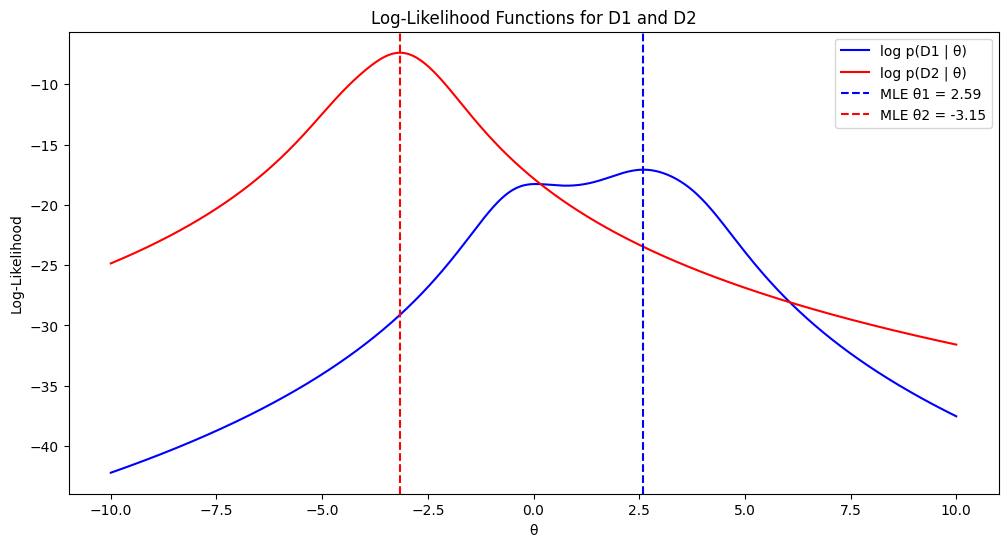

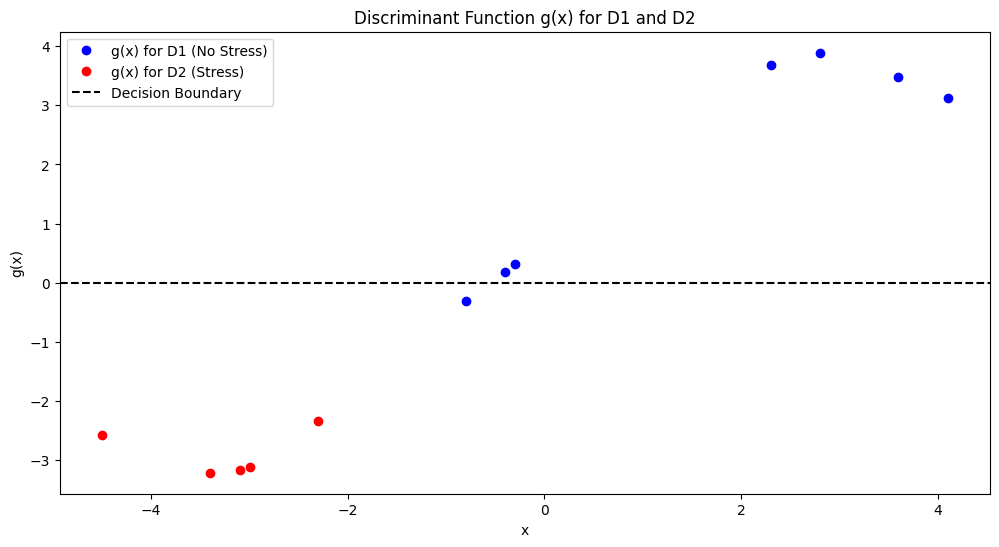

D1 classifications: ['No Stress', 'No Stress', 'Stress', 'No Stress', 'No Stress', 'No Stress', 'No Stress']
D2 classifications: ['Stress', 'Stress', 'Stress', 'Stress', 'Stress']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MLE_Classifier:

  # Log-likelihood function -- log[p(x|θ)]
  def log_likelihood(self, theta, data):
    return np.sum(-np.log(np.pi * (1 + (data - theta)**2))) # Lecture 4, slide 15

  # MLE estimate
  def fit(self, D, theta_values):

    # Compute log-likelihood for D
    log_likelihood_D = [self.log_likelihood(theta, D) for theta in theta_values]

    # Find θ that maximizes the log-likelihood (MLE estimate)
    self.theta_MLE_D = theta_values[np.argmax(log_likelihood_D)]

    return self.theta_MLE_D

  # Discriminant function g(x)
  def predict(self, D, theta_MLE_D1, theta_MLE_D2, P_omega1, P_omega2):

    for x in D:
      likelihood1 = 1 / (np.pi * (1 + (D - theta_MLE_D1)**2))
      likelihood2 = 1 / (np.pi * (1 + (D - theta_MLE_D2)**2))

      g = [np.log(likelihood1) - np.log(likelihood2) + np.log(P_omega1) - np.log(P_omega2)]

    return g


#####################################################

# Dataset for each class
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Range of θ values for evaluation
theta_vals = np.linspace(-10, 10, 1000)

# a priori probabilities
P_omega1 = 7 / 12
P_omega2 = 5 / 12

c1 = MLE_Classifier()
c2 = MLE_Classifier()

theta_MLE_D1 = c1.fit(D1, theta_vals)
theta_MLE_D2 = c2.fit(D2, theta_vals)

log_likelihood_D1 = [c1.log_likelihood(theta, D1) for theta in theta_vals]
log_likelihood_D2 = [c2.log_likelihood(theta, D2) for theta in theta_vals]

# 1

# Print results
print(f"MLE Estimate for θ1 (D1): {theta_MLE_D1}")
print(f"MLE Estimate for θ2 (D2): {theta_MLE_D2}")

# Plot log-likelihood functions
plt.figure(figsize=(12, 6))
plt.plot(theta_vals, log_likelihood_D1, label="log p(D1 | θ)", color='blue')
plt.plot(theta_vals, log_likelihood_D2, label="log p(D2 | θ)", color='red')
plt.axvline(theta_MLE_D1, color='blue', linestyle="--", label=f"MLE θ1 = {theta_MLE_D1:.2f}")
plt.axvline(theta_MLE_D2, color='red', linestyle="--", label=f"MLE θ2 = {theta_MLE_D2:.2f}")
plt.xlabel("θ")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.title("Log-Likelihood Functions for D1 and D2")
plt.show()

# 2

g_D1 = c1.predict(D1, theta_MLE_D1, theta_MLE_D2, P_omega1, P_omega2)
g_D2 = c1.predict(D2, theta_MLE_D1, theta_MLE_D2, P_omega1, P_omega2)

# Plot discriminant function values
plt.figure(figsize=(12, 6))
plt.plot(D1, np.transpose(g_D1), 'bo', label="g(x) for D1 (No Stress)")
plt.plot(D2, np.transpose(g_D2), 'ro', label="g(x) for D2 (Stress)")
plt.axhline(0, color='black', linestyle="--", label="Decision Boundary")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.title("Discriminant Function g(x) for D1 and D2")
plt.show()

# Classification decisions based on g(x)
D1_classifications = ["No Stress" if g > 0 else "Stress" for g in np.transpose(g_D1)]
D2_classifications = ["No Stress" if g > 0 else "Stress" for g in np.transpose(g_D2)]

print("D1 classifications:", D1_classifications)
print("D2 classifications:", D2_classifications)




In [ ]:
g_D2, g_D1

([array([-2.56670775, -3.21289282, -3.16943035, -3.11470049, -2.33300933])],
 [array([ 3.89002193,  0.18775268, -0.31250208,  3.67979302,  0.31198277,
          3.47762721,  3.13268875])])

# ΜΕΡΟΣ Β

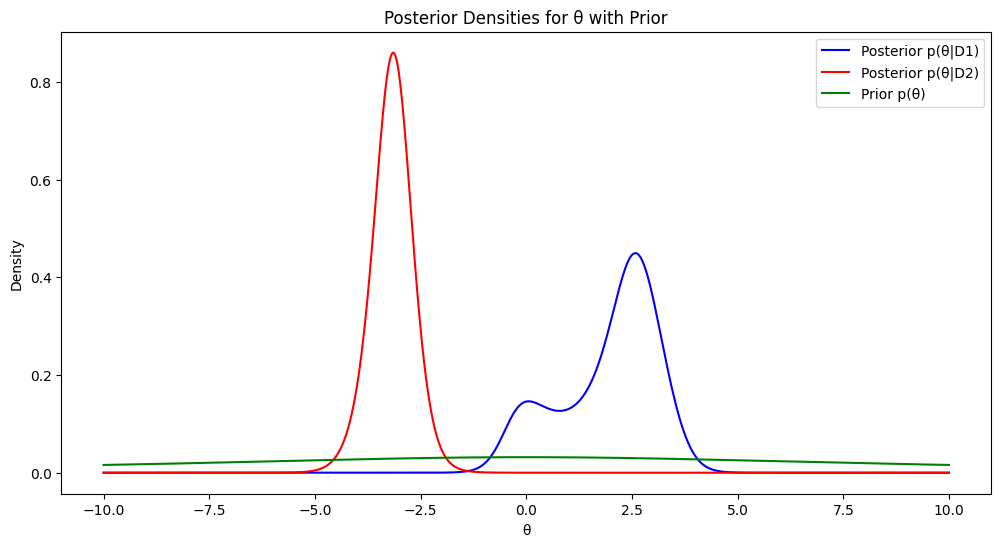

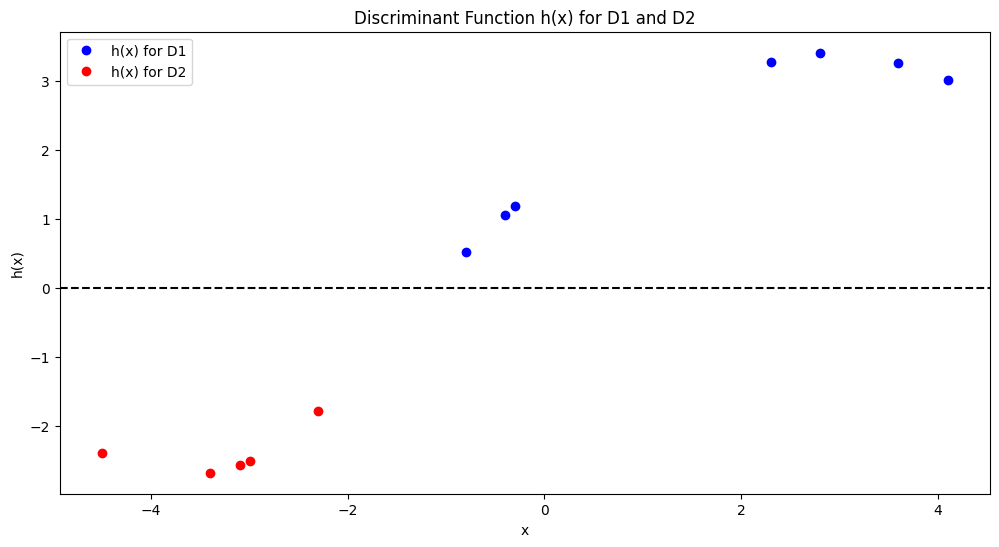

D1 classifications: ['No Stress', 'No Stress', 'No Stress', 'No Stress', 'No Stress', 'No Stress', 'No Stress']
D2 classifications: ['Stress', 'Stress', 'Stress', 'Stress', 'Stress']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BayesianClassifier:
    def __init__(self):
        self.posterior_D1 = None
        self.posterior_D2 = None

    # Likelihood function
    def likelihood(self, x, theta):
      return 1 / (np.pi * (1 + (x - theta)**2))

    # Calculate the prior p(θ)
    def prior(self, theta):
        return 1 / (10 * np.pi * (1 + (theta / 10)**2))

    # Calculate the posterior p(θ|D)
    def posterior_density(self, theta_vals, data):
        posterior = self.prior(theta_vals)
        for x in data:
            posterior *= self.likelihood(x, theta_vals)
        normalization_factor = np.trapz(posterior, theta_vals)
        return posterior / normalization_factor

    # Calculate p(x|D)
    def class_conditional_density(self, x, theta_vals, posterior_D):
        p = self.likelihood(x, theta_vals) * posterior_D
        return np.trapz(p, theta_vals)

    # Fit the posterior densities for the datasets
    def fit(self, D1, D2, theta_vals):
        self.posterior_D1 = self.posterior_density(theta_vals, D1)
        self.posterior_D2 = self.posterior_density(theta_vals, D2)

    # Predict using the Bayesian discriminant function h(x)
    def predict(self, x_values, theta_vals, P_omega1, P_omega2):
        predictions = []
        for x in x_values:
            # Calculate p(x|D1) and p(x|D2)
            p_x_given_D1 = self.class_conditional_density(x, theta_vals, self.posterior_D1)
            p_x_given_D2 = self.class_conditional_density(x, theta_vals, self.posterior_D2)
            # Compute the discriminant function h(x)
            h_x = np.log(p_x_given_D1) - np.log(p_x_given_D2) + np.log(P_omega1) - np.log(P_omega2)
            predictions.append(h_x)
        return predictions

########################################################

# Data for each class
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])  # No stress
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])          # Stress

# Range of θ values for evaluation
theta_vals = np.linspace(-10, 10, 1000)

# Prior probabilities of the classes
P_omega1 = 7 / 12
P_omega2 = 5 / 12

# Instantiate the Bayesian classifier
classifier = BayesianClassifier()

# Fit the posterior densities
classifier.fit(D1, D2, theta_vals)

# Predict using the Bayesian classifier
bayes_predictions_D1 = classifier.predict(D1, theta_vals, P_omega1, P_omega2)
bayes_predictions_D2 = classifier.predict(D2, theta_vals, P_omega1, P_omega2)

# Print predictions
#print("Classifications for D1:", bayes_predictions_D1)
#print("Classifications for D2:", bayes_predictions_D2)

# Visualize posterior densities
posterior_D1 = classifier.posterior_D1
posterior_D2 = classifier.posterior_D2

plt.figure(figsize=(12, 6))
plt.plot(theta_vals, posterior_D1, label="Posterior p(θ|D1)", color='blue')
plt.plot(theta_vals, posterior_D2, label="Posterior p(θ|D2)", color='red')
plt.plot(theta_vals, classifier.prior(theta_vals), label="Prior p(θ)", color='green')
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend()
plt.title("Posterior Densities for θ with Prior")
plt.show()

# Plot h(x) for both datasets
plt.figure(figsize=(12, 6))
plt.plot(D1, bayes_predictions_D1, 'bo', label="h(x) for D1")
plt.plot(D2, bayes_predictions_D2, 'ro', label="h(x) for D2")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("x")
plt.ylabel("h(x)")
plt.legend()
plt.title("Discriminant Function h(x) for D1 and D2")
plt.show()

# Classification decision based on the sign of h(x)
D1_classifications = ["No Stress" if hx > 0 else "Stress" for hx in bayes_predictions_D1]
D2_classifications = ["No Stress" if hx > 0 else "Stress" for hx in bayes_predictions_D2]

print("D1 classifications:", D1_classifications)
print("D2 classifications:", D2_classifications)



# ΜΕΡΟΣ Γ

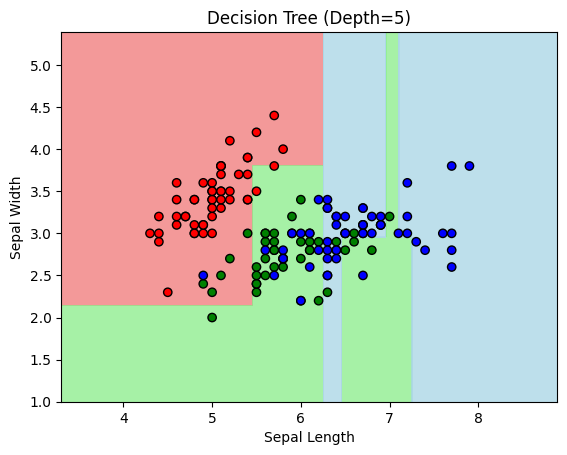

Decision Tree Best Depth: 5, Accuracy: 0.69
Random Forest Best Depth: 10, Accuracy: 0.73


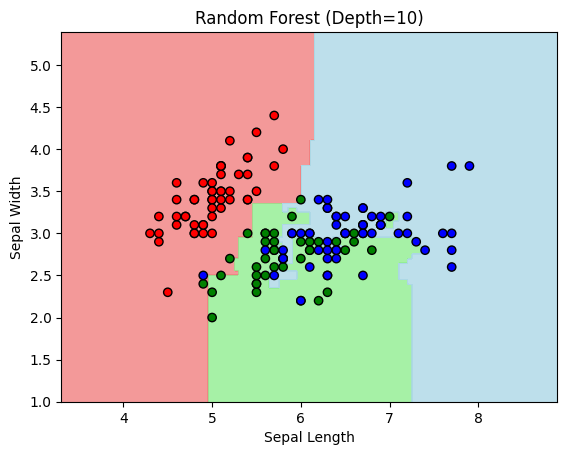

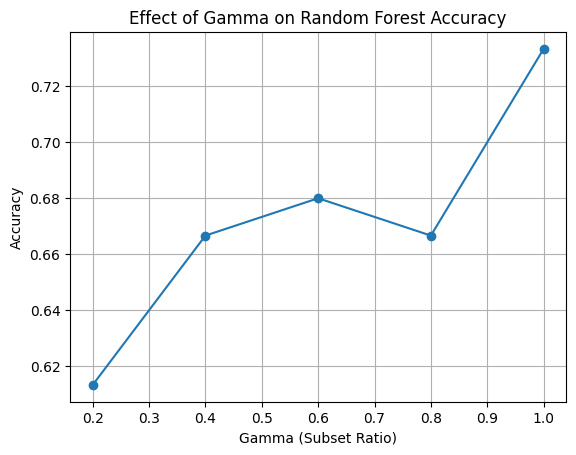

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # , confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

iris = datasets.load_iris()

X = iris.data[:,:2]   # Only the first two features
y = iris.target       # Class labels

# Split the dataset: 50% for training and 50% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# 1η ενοτητα

# 1.1
best_depth = 0;
best_accuracy = 0;
accuracies = [];

for depth in range(1,11):
  dtc = DecisionTreeClassifier(max_depth=depth, random_state=42)
  # Εκπαίδευση του μοντέλου
  dtc.fit(X_train, y_train)
  # Προβλέψεις με το test set
  y_pred = dtc.predict(X_test)
  # Αξιολόγηση του μοντέλου
  accuracy = accuracy_score(y_test, y_pred)
  # find best depth
  accuracies.append(accuracy)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_depth = depth

# Train the best model
dtc_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dtc_best.fit(X_train, y_train)

# 1.2

# Function to plot decision boundaries using contourf
def plot_decision_boundary(model, X, y, title):
    # Define grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a colormap
    cmap_light = ListedColormap(['lightcoral', 'lightgreen', 'lightblue'])  # for decision regions
    cmap_bold = ListedColormap(['red', 'green', 'blue']) # for data points

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

    # Scatter plot for data
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    # plt.colorbar(label='Class')
    plt.show()


# Plot for the Decision Tree
plot_decision_boundary(dtc_best, X, y, f"Decision Tree (Depth={best_depth})")

# Print accuracy
print(f"Decision Tree Best Depth: {best_depth}, Accuracy: {best_accuracy:.2f}")


# 2η Ενότητα

# 1

n_estimators = 100
gamma = 0.5  # 50% of the training set for each tree
subset_size = int(gamma * len(X_train)) # Calculates the number of samples (rows) for each tree's training subset

# Train Random Forest with all trees having the same maximum depth
best_depth_rf = 0
best_accuracy_rf = 0
rf_accuracies = []

for depth in range(1, 11):
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    #rf_clf.fit(X_train[:subset_size], y_train[:subset_size]) # ?
    y_pred_rf = rf_clf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(accuracy_rf)
    if accuracy_rf > best_accuracy_rf:
        best_accuracy_rf = accuracy_rf
        best_depth_rf = depth

# Train the best Random Forest model
rf_clf_best = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_depth_rf, random_state=42)
rf_clf_best.fit(X_train, y_train)

# Print accuracy
print(f"Random Forest Best Depth: {best_depth_rf}, Accuracy: {best_accuracy_rf:.2f}")

# 2
plot_decision_boundary(rf_clf_best, X, y, f"Random Forest (Depth={best_depth_rf})")

# 3
# Analyze the effect of gamma on the accuracy
gamma_values = [0.2, 0.4, 0.6, 0.8, 1.0]
gamma_accuracies = []

for gamma in gamma_values:
    subset_size = int(gamma * len(X_train))
    rf_clf_gamma = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_depth_rf, random_state=42)
    rf_clf_gamma.fit(X_train[:subset_size], y_train[:subset_size])
    y_pred_gamma = rf_clf_gamma.predict(X_test)
    gamma_accuracies.append(accuracy_score(y_test, y_pred_gamma))

# Plot the effect of gamma
plt.plot(gamma_values, gamma_accuracies, marker='o')
plt.title("Effect of Gamma on Random Forest Accuracy")
plt.xlabel("Gamma (Subset Ratio)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

